In [3]:
import pandas as pd
import sklearn.ensemble as sken
import numpy as np
import sklearn.metrics as mts
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [4]:
# df = pd.read_csv('https://raw.githubusercontent.com/thecodizt/Datasets/main/music_processed_data_encoded.csv')
df= pd.read_csv('data.csv')

In [5]:
df.head()

,Unnamed: 0,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,artist_name,composer,lyricist,language,genre_id,city,bd,gender,registered_via,registration_init_time,expiration_date
0,0,273,7641,3,8,4,1,229982,129,3782,3496,31.0,465,13,24,0,9,20110525,20170911
1,1,273,2363,3,8,3,1,224597,1640,4781,4522,3.0,465,13,24,0,9,20110525,20170911
2,2,273,4711,3,8,3,0,210364,1947,1745,2448,3.0,465,13,24,0,9,20110525,20170911
3,3,273,1892,3,8,3,1,240624,1322,1330,1705,31.0,465,13,24,0,9,20110525,20170911
4,4,273,9121,3,8,3,1,248685,1890,5744,5726,3.0,465,13,24,0,9,20110525,20170911


In [6]:
df.drop(columns='Unnamed: 0',inplace=True)

In [7]:
clf = sken.GradientBoostingClassifier()

In [8]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['target','genre_id']),df['target'],test_size=0.2)

In [9]:
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [10]:
predicted = clf.predict(x_test)

In [11]:
mts.accuracy_score(y_test,predicted)

0.6595873786407767

In [12]:
clf = sken.GradientBoostingClassifier(learning_rate=0.3,n_estimators=1000)

In [13]:
clf.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.3, n_estimators=1000)

In [14]:
predicted = clf.predict(x_test)

In [15]:
mts.accuracy_score(y_test,predicted)

0.7210760517799353

In [16]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      6464
           1       0.74      0.78      0.76      8368

    accuracy                           0.72     14832
   macro avg       0.72      0.71      0.71     14832
weighted avg       0.72      0.72      0.72     14832



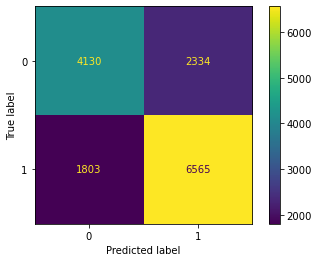

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test,predicted)

In [18]:
clf = sken.GradientBoostingClassifier(learning_rate=0.4,n_estimators=1000)

In [19]:
clf.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.4, n_estimators=1000)

In [20]:
predicted = clf.predict(x_test)

In [21]:
mts.accuracy_score(y_test,predicted)

0.7169633225458468

In [22]:
clf = sken.GradientBoostingClassifier(learning_rate=0.4,n_estimators=5000)

In [23]:
clf.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.4, n_estimators=5000)

In [24]:
predicted = clf.predict(x_test)

In [25]:
mts.accuracy_score(y_test,predicted)

0.7135922330097088

In [27]:
from sklearn.model_selection import GridSearchCV

gs_param = {"n_estimators":[50,100,300,500,1000],"max_depth":[3,5,7],"subsample":[0.5,0.8,1],"learning_rate":[0.1,0.01,0.3]}



gs_cv = GridSearchCV(clf, gs_param, cv=3, n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


KeyboardInterrupt: 